In [69]:
import pandas as pd
import os
import numpy as np

In [70]:
def calculate_letter_positions(start_coordinate, interval=0.04):
    """
    3x3x3のマスにA～Zを配置し、それぞれのUnity空間上の(x, y, z)座標を求める。
    中心(N)が start_coordinate に対応するように設定。

    :param start_coordinate: N(中心)を置きたいワールド座標 (x, y, z)
    :param interval: グリッド間のオフセット量
    :return: { 'A': (xA, yA, zA), 'B': (xB, yB, zB), ... } のような辞書
    """

    # 3×3×3の各レイヤー(z方向)にA~Zを割り当てたリスト
    # z=0 が「手前」、z=2 が「奥」になる想定
    # y=0 が「上」、y=2 が「下」
    # x=0 が「左」、x=2 が「右」
    letters_3d = [
        [  # z = 0 (手前)
            ['A', 'B', 'C'],  # y = 0 (上)
            ['D', 'E', 'F'],  # y = 1 (中)
            ['G', 'H', 'I']   # y = 2 (下)
        ],
        [  # z = 1 (中)
            ['J', 'K', 'L'],
            ['M', 'N', 'O'],
            ['P', 'Q', 'R']
        ],
        [  # z = 2 (奥)
            ['S', 'T', 'U'],
            ['V', 'W', 'X'],
            ['Y', 'Z', None]  # ここは1つ余り(26文字でZまで)
        ]
    ]

    # 3×3×3グリッドのうち、インデックス1,1,1が中心（N となる）
    mid_index = 1
    
    letter_positions = {}

    # z, y, x の順にループして座標計算
    for z in range(3):
        for y in range(3):
            for x in range(3):
                letter = letters_3d[z][y][x]
                if letter is None:
                    # 余りマスなのでスキップ
                    continue

                # (x-mid_index, y-mid_index, z-mid_index) に基づいて
                # Unity座標のオフセットを算出
                offset_x = (x - mid_index) * interval
                offset_y = (y - mid_index) * interval
                offset_z = (z - mid_index) * interval

                # start_coordinate(Nの位置)を中心とする座標
                pos_x = start_coordinate[0] + offset_x
                pos_y = start_coordinate[1] - offset_y
                pos_z = start_coordinate[2] + offset_z

                letter_positions[letter] = (pos_x, pos_y, pos_z)

    return letter_positions



# 中心 (N) の座標
start_coordinate = (0, -0.23,  0.2)  # => (0, -0.23, 0.35)
interval = 0.04  # 文字間の隙間

place_values = calculate_letter_positions(start_coordinate, interval)

# 結果を確認
for letter in sorted(place_values.keys()):
    print(f"{letter}: {place_values[letter]}")


A: (-0.04, -0.19, 0.16)
B: (0.0, -0.19, 0.16)
C: (0.04, -0.19, 0.16)
D: (-0.04, -0.23, 0.16)
E: (0.0, -0.23, 0.16)
F: (0.04, -0.23, 0.16)
G: (-0.04, -0.27, 0.16)
H: (0.0, -0.27, 0.16)
I: (0.04, -0.27, 0.16)
J: (-0.04, -0.19, 0.2)
K: (0.0, -0.19, 0.2)
L: (0.04, -0.19, 0.2)
M: (-0.04, -0.23, 0.2)
N: (0.0, -0.23, 0.2)
O: (0.04, -0.23, 0.2)
P: (-0.04, -0.27, 0.2)
Q: (0.0, -0.27, 0.2)
R: (0.04, -0.27, 0.2)
S: (-0.04, -0.19, 0.24000000000000002)
T: (0.0, -0.19, 0.24000000000000002)
U: (0.04, -0.19, 0.24000000000000002)
V: (-0.04, -0.23, 0.24000000000000002)
W: (0.0, -0.23, 0.24000000000000002)
X: (0.04, -0.23, 0.24000000000000002)
Y: (-0.04, -0.27, 0.24000000000000002)
Z: (0.0, -0.27, 0.24000000000000002)


In [71]:
sound_percentage=[]
no_sound_percentage=[]

In [72]:
def calculate_values(df,subject_name,method):
    # データ範囲を取得
    data = df.values
    # print(data)
    # 結果を出力する
    results=[]
    place_value=0 
    correct_count=0
    mistake_count=0
     

    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("alphabet index:"):
            place_text,place_value=data[i][0].split(":")
            # place_value=int(place_value)
            row_count=0
        else:
            x_error= abs(float(data[i][0])-float(place_values[place_value][0]))
            y_error= abs(float(data[i][1])-float( place_values[place_value][1]))
            z_error=abs(float(data[i][2])- float( place_values[place_value][2]))
            correct=0
            if x_error<interval/2 and y_error<interval/2 and z_error<interval/2:
                correct=1
                correct_count+=1
            else:
                mistake_count+=1
                
            
            squared_error=np.sqrt(x_error**2+y_error**2+z_error**2)
            results.append([
                subject_name,
                method,
                place_value,
               x_error,
              y_error,
              z_error,
              squared_error,
              correct
                ])
            row_count+=1
    if method==-1:
        sound_percentage.append([correct_count/(correct_count+mistake_count)])
    elif method==0:
        no_sound_percentage.append([correct_count/(correct_count+mistake_count)])
    return results
            
    
    
    

In [73]:
# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [74]:
import pathlib
import datetime
# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name):
    for i, file_path in enumerate(files_paths):
            method=i-1
            print(i-1,file_path)
          
            df = read_txt_to_dataframe(file_path)
        
            all_results.extend(calculate_values(df,subject_name, method))
            
      

In [75]:


# subject_names=["河合","菊池","竹村","廣野里奈","水上","佐々木","小谷","岡本","島川","ほうさん","村上","平岡","浦西","歩さん","伊藤","朴さん"]
# subject_names=["平岡","野中","太田","小谷","伊藤"]
subject_names=["平岡","野中","太田","小谷","伊藤","岡本","廣野里奈","菊池","磯崎","竹村"]
# subject_names=["磯崎","竹村"]


for i in range(len(subject_names)):
        root_path = r"C:\Users\takaharayota\Research\VRKeyboardStatistics\{}".format(subject_names[i])
        files_paths = [
                root_path + r"\音あり.txt",
                root_path + r"\音無し.txt",
             
        
        ]

        # # ファイル名と元のインデックスのタプルのリストを作成
        # indexed_files = list(enumerate(files_paths))
        # # 作成日時順に並べ替える
        # sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # # 並べ替え後のインデックスを抽出
        # sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i])
    
print(all_results)  


# 統合されたデータをデータフレームに変換
columns = ['Subject','Method', 'Place', 'X', 'Y', 'Z','Sum_Squared_Error','Correct']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output.txt', sep='\t', index=False)

print("DataFrameの内容がoutput.txtに出力されました。")

-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\平岡\音あり.txt
0 C:\Users\takaharayota\Research\VRKeyboardStatistics\平岡\音無し.txt
-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\野中\音あり.txt
0 C:\Users\takaharayota\Research\VRKeyboardStatistics\野中\音無し.txt
-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\太田\音あり.txt
0 C:\Users\takaharayota\Research\VRKeyboardStatistics\太田\音無し.txt
-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\小谷\音あり.txt
0 C:\Users\takaharayota\Research\VRKeyboardStatistics\小谷\音無し.txt
-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\伊藤\音あり.txt
0 C:\Users\takaharayota\Research\VRKeyboardStatistics\伊藤\音無し.txt
-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\岡本\音あり.txt
0 C:\Users\takaharayota\Research\VRKeyboardStatistics\岡本\音無し.txt
-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\廣野里奈\音あり.txt
0 C:\Users\takaharayota\Research\VRKeyboardStatistics\廣野里奈\音無し.txt
-1 C:\Users\takaharayota\Research\VRKeyboardStatistics\菊池\音あり.txt
0 C:\Users\ta

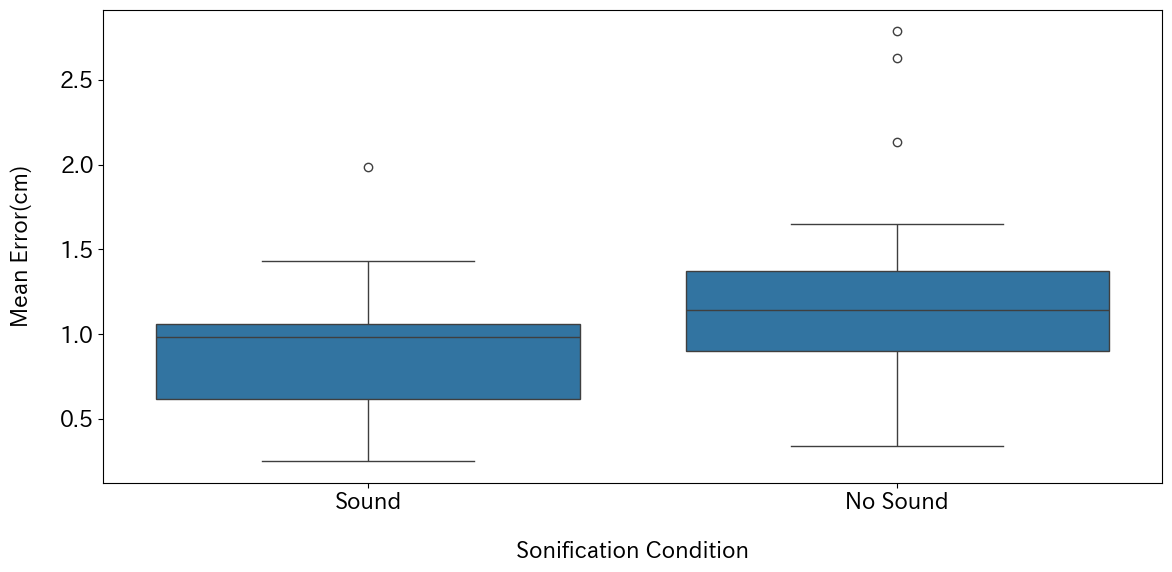

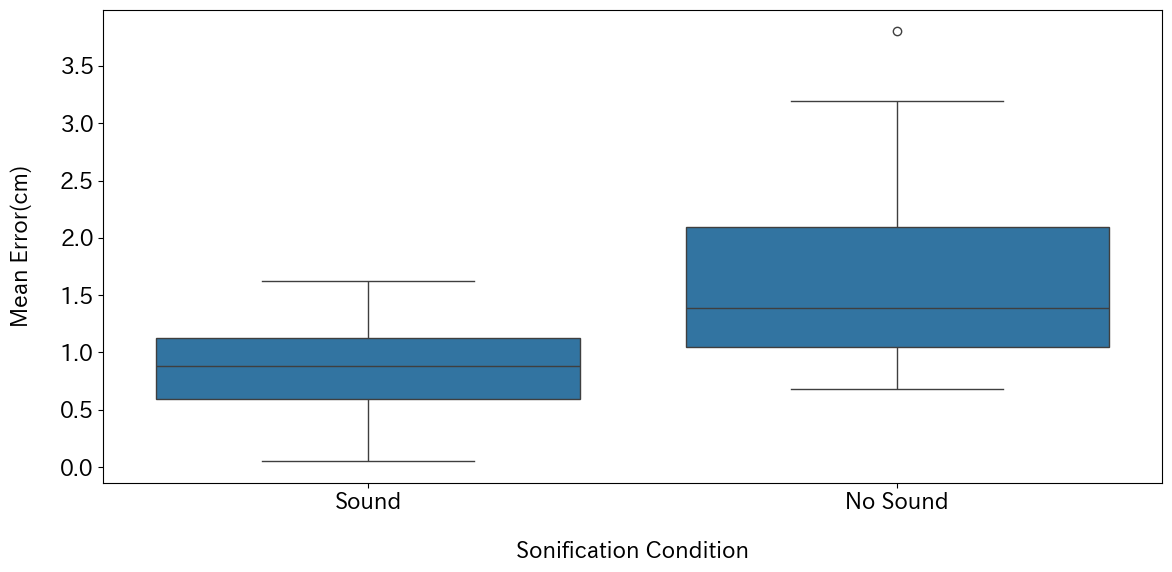

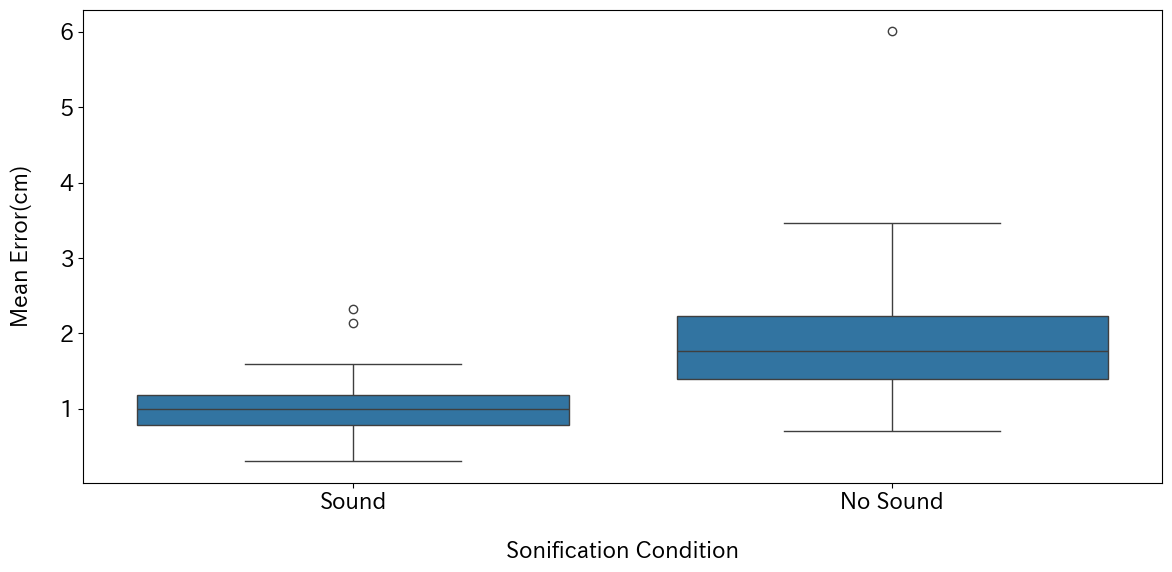

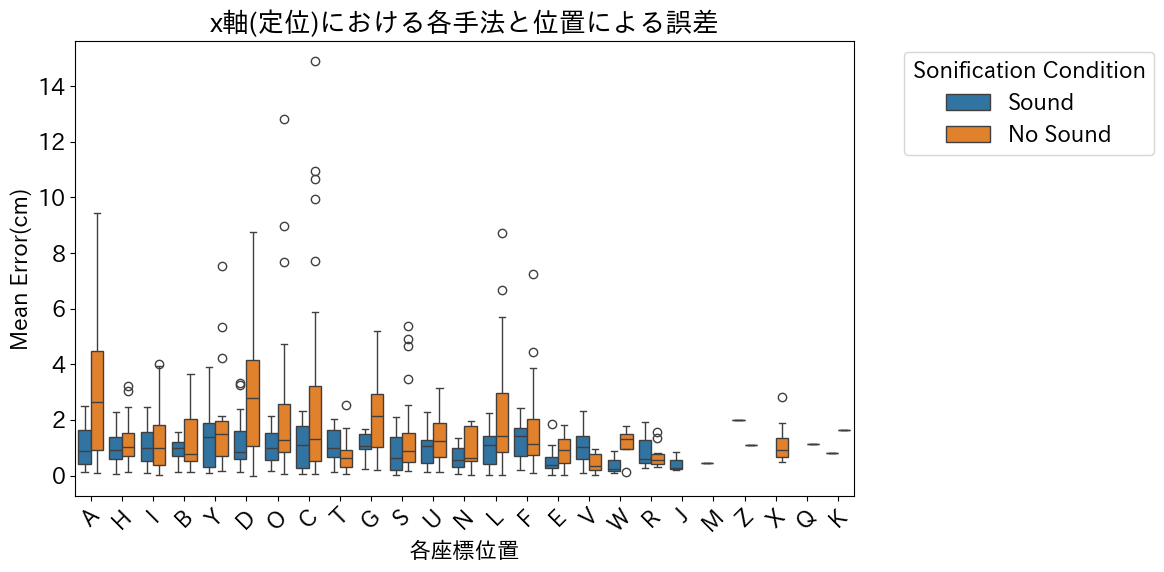

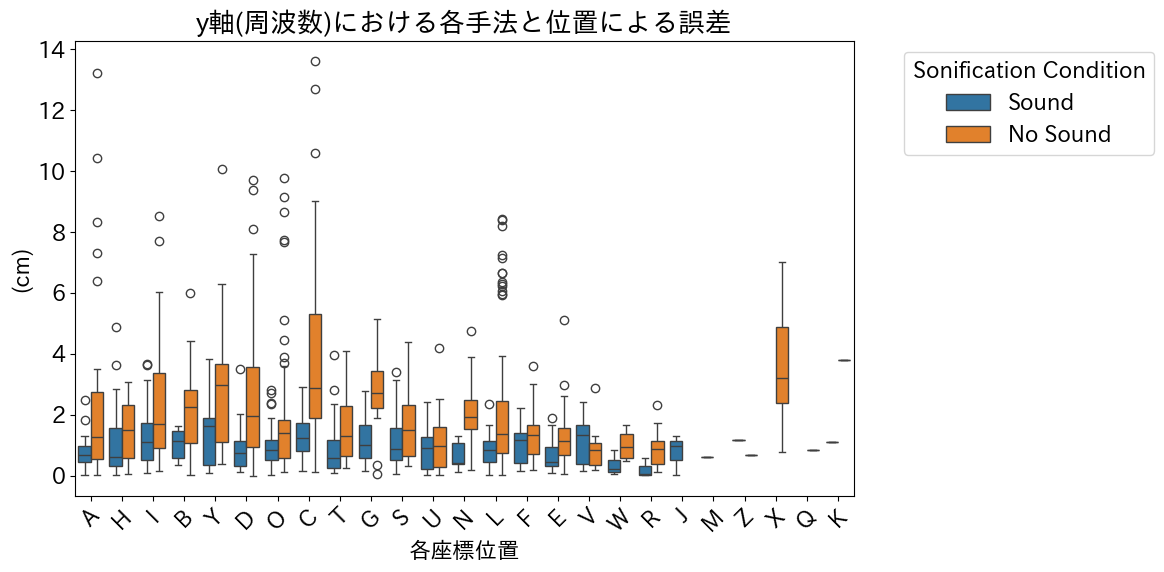

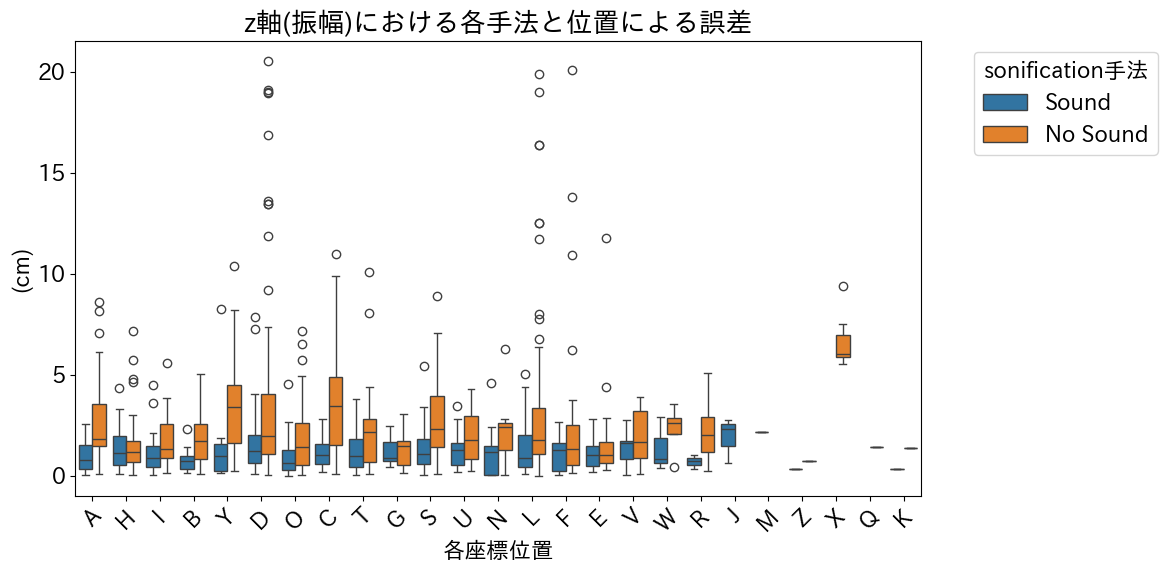

In [76]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib




# MethodとPlaceの具体的な意味をラベルに追加
method_labels = {
    -1: 'Sound',
    0: 'No Sound',
 }

df_all['Method_Label'] = df_all['Method'].map(method_labels)
# df_all['Place_Label'] = df_all['Place'].map(place_labels)

df_all['X'] = df_all['X'] * 100
df_all['Y'] = df_all['Y'] * 100
df_all['Z'] = df_all['Z'] * 100

# Placeごとの中央値を計算 (数値列のみ対象)
numeric_columns = ['X', 'Y', 'Z']
df_median = df_all.groupby(['Place', 'Method'])[numeric_columns].median().reset_index()


# Methodのラベルを追加
df_median['Method_Label'] = df_median['Method'].map(method_labels)
# df_mean['Method_Label'] = df_mean['Method'].map(method_labels)

plt.rcParams.update({'font.size': 16})

# 中央値プロット
for axis in ['X', 'Y', 'Z']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Method_Label', y=axis, data=df_median)
    plt.title('')
    plt.xlabel('Sonification Condition',labelpad=20)
    plt.ylabel('Mean Error(cm)',labelpad=20)
    plt.tight_layout()
    # Adding the annotation text
    # plt.text(2,8, '*: p < 0.05', horizontalalignment='right', verticalalignment='top', fontsize=18)

    plt.show()


# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置による誤差')
plt.xlabel('各座標位置')
plt.ylabel('Mean Error(cm)')
plt.legend(title='Sonification Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置による誤差')
plt.xlabel('各座標位置')
plt.ylabel('(cm)')
plt.legend(title='Sonification Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置による誤差')
plt.xlabel('各座標位置')
plt.ylabel('(cm)')
plt.legend(title='sonification手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


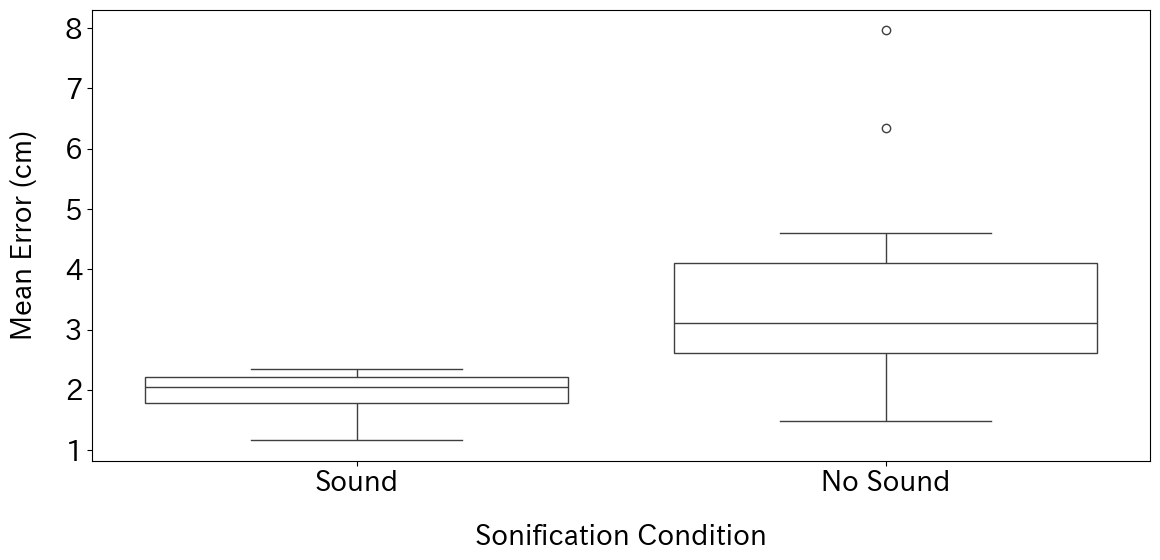

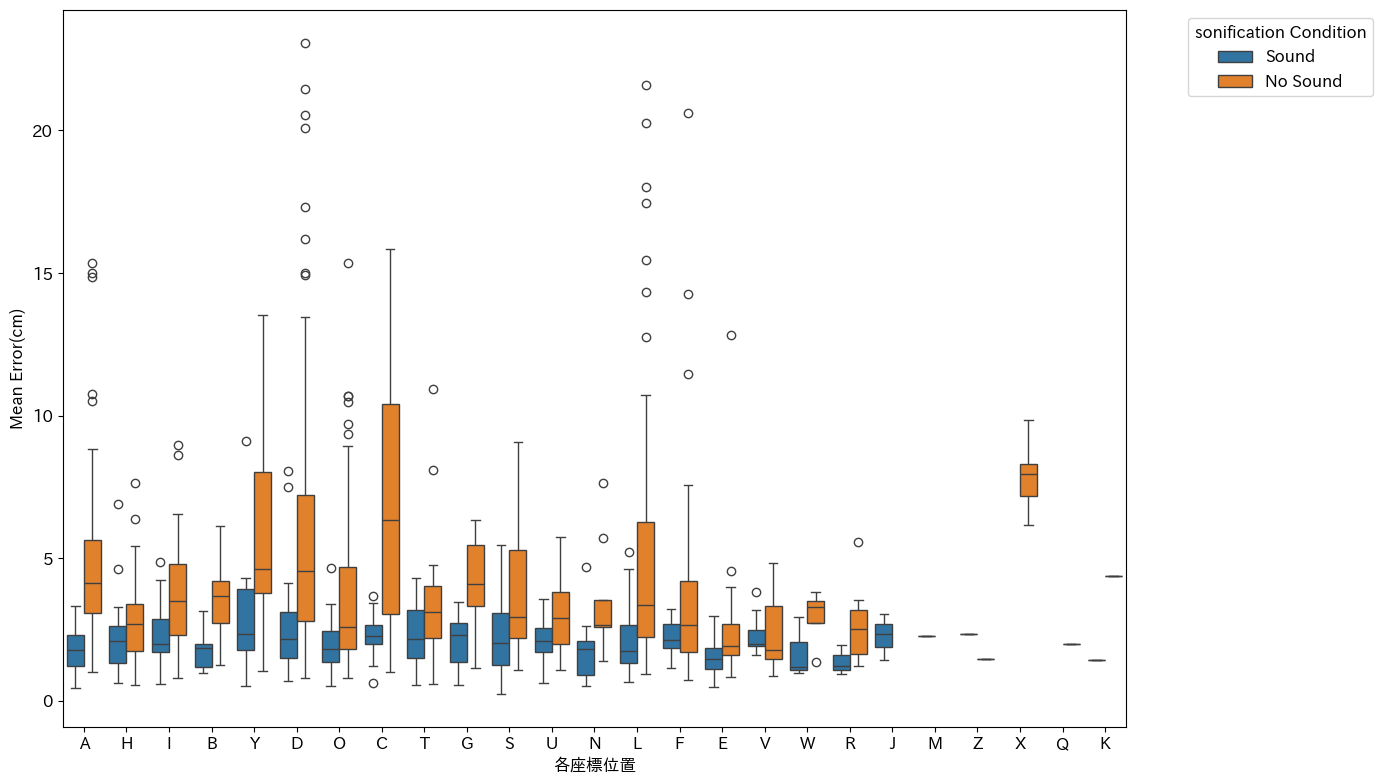

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import japanize_matplotlib

# 二乗平方和の列を追加
df_all['Sum_Squared_Error'] = np.sqrt(df_all['X']**2 + df_all['Y']**2 + df_all['Z']**2)

# ラベルの並び順を定義（必要な順序に合わせて変更してください）
method_order = ["Sound",  "No Sound"]

df_median_sse_method = df_all.groupby(['Place','Method'])['Sum_Squared_Error'].median().reset_index()
df_median_sse_method['Method_Label'] = df_median_sse_method['Method'].map(method_labels)

# カテゴリ型で順序付けする
df_median_sse_method['Method_Label'] = pd.Categorical(df_median_sse_method['Method_Label'],
                                                      categories=method_order,
                                                      ordered=True)

# Method_Label順に並び替え
df_median_sse_method = df_median_sse_method.sort_values(['Method_Label', 'Place', 'Method'])

# 並び替えた後にCSV出力
df_median_sse_method.to_csv('median-sse-method.txt', sep='\t', index=False)

plt.rcParams.update({'font.size': 20})

# Methodごとの二乗平方和のボックスプロットを作成
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method_Label', y='Sum_Squared_Error', data=df_median_sse_method, boxprops=dict(facecolor='none'))
plt.title('')
plt.xlabel('Sonification Condition',labelpad=20)
plt.ylabel('Mean Error (cm)',labelpad=20)
# plt.text(2.5,13.3, '*: p < 0.05', horizontalalignment='right', verticalalignment='top', fontsize=18)

plt.tight_layout()
# plt.ylim(0,16)
plt.show()


plt.rcParams.update({'font.size': 12})

# Placeごとの二乗平方和の分布を可視化
plt.figure(figsize=(14, 8))
sns.boxplot(x='Place', y='Sum_Squared_Error', hue='Method_Label', data=df_all)
plt.title('')
plt.xlabel('各座標位置')
plt.ylabel('Mean Error(cm)')
plt.legend(title='sonification Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


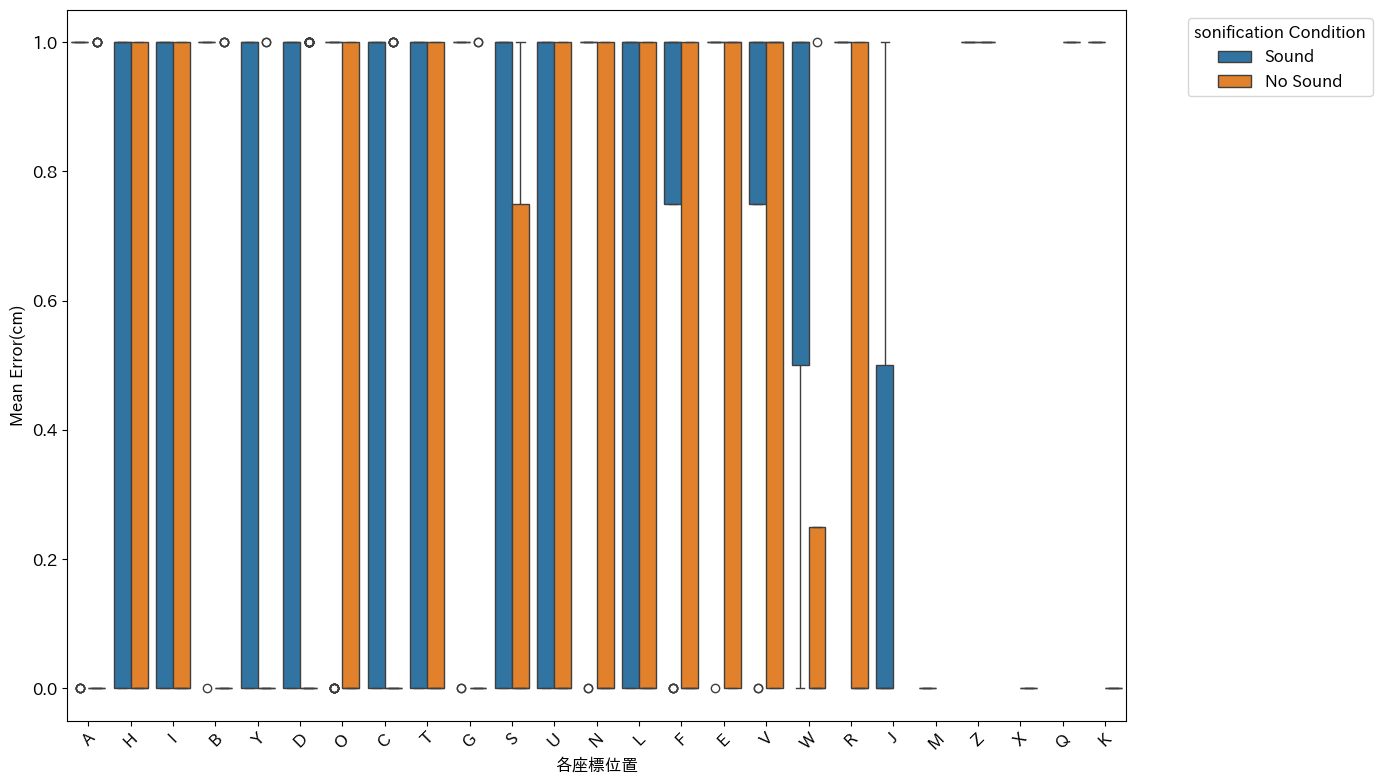

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import japanize_matplotlib

# 二乗平方和の列を追加
df_all['Sum_Squared_Error'] = np.sqrt(df_all['X']**2 + df_all['Y']**2 + df_all['Z']**2)

# ラベルの並び順を定義（必要な順序に合わせて変更してください）
method_order = ["Sound",  "No Sound"]

df_median_sse_method = df_all.groupby(['Place','Method'])['Sum_Squared_Error'].median().reset_index()
df_median_sse_method['Method_Label'] = df_median_sse_method['Method'].map(method_labels)

# カテゴリ型で順序付けする
df_median_sse_method['Method_Label'] = pd.Categorical(df_median_sse_method['Method_Label'],
                                                      categories=method_order,
                                                      ordered=True)

# Method_Label順に並び替え
df_median_sse_method = df_median_sse_method.sort_values(['Method_Label', 'Place', 'Method'])

# 並び替えた後にCSV出力
df_median_sse_method.to_csv('median-sse-method.txt', sep='\t', index=False)

plt.rcParams.update({'font.size': 20})



plt.rcParams.update({'font.size': 12})

# Placeごとの二乗平方和の分布を可視化
plt.figure(figsize=(14, 8))
sns.boxplot(x='Place', y='Correct', hue='Method_Label', data=df_all)
plt.title('')
plt.xlabel('各座標位置')
plt.ylabel('Mean Error(cm)')
plt.legend(title='sonification Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [79]:
print(sound_percentage)
print(no_sound_percentage)

[[0.8125], [0.8214285714285714], [0.5714285714285714], [0.8076923076923077], [0.6153846153846154], [0.5], [0.9523809523809523], [0.5441176470588235], [0.8918918918918919], [0.8064516129032258]]
[[0.3333333333333333], [0.11666666666666667], [0.38235294117647056], [0.2982456140350877], [0.3783783783783784], [0.2], [0.22727272727272727], [0.6020408163265306], [0.3392857142857143], [0.05]]


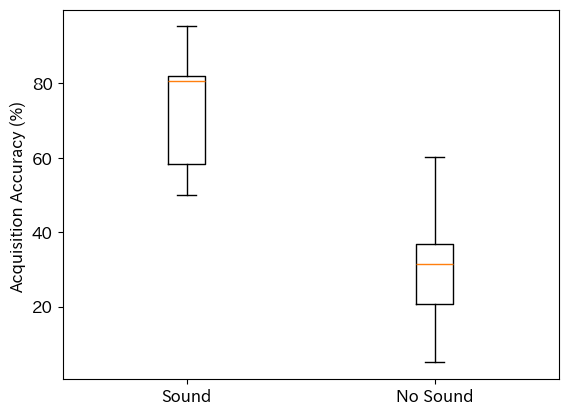

<Figure size 1000x600 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt

# 与えられた 2 つのデータ
data1 =sound_percentage

data2 =no_sound_percentage

# ネストしたリストになっているので、箱ひげ図に渡しやすいように 1 次元リストに平坦化する
data1_flat = [val[0]*100 for val in data1]
data2_flat = [val[0]*100 for val in data2]

# matplotlib の boxplot に渡すデータをリスト化
data_for_plot = [data1_flat, data2_flat]

# 箱ひげ図を作成
fig, ax = plt.subplots()
ax.boxplot(data_for_plot, labels=['Sound', 'No Sound'])

# 軸ラベルやタイトルなどを付ける（お好みで調整）
ax.set_ylabel('Acquisition Accuracy (%) ')
ax.set_title('')
plt.figure(figsize=(10, 6))
# 描画
plt.show()


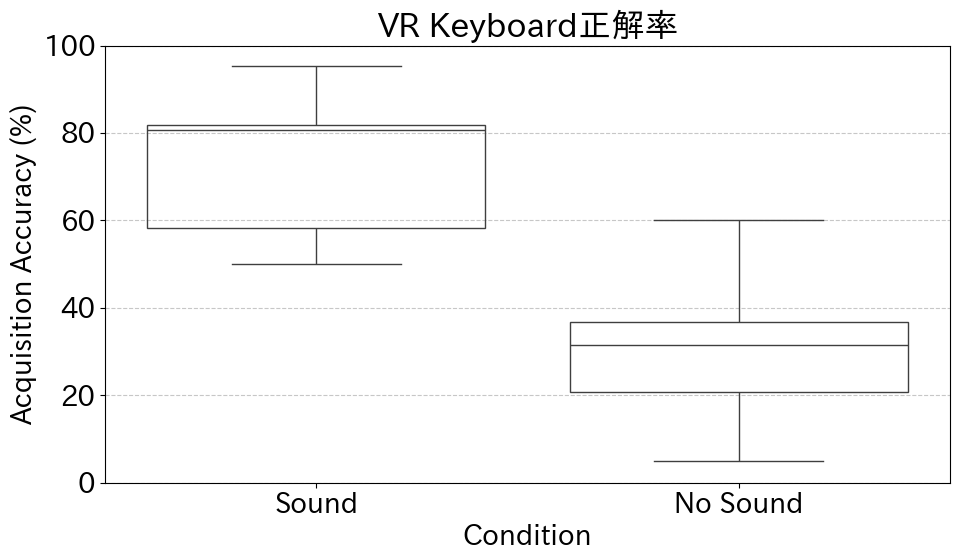

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sound_percentage, no_sound_percentage は
# [[0.8125], [0.8214285714], ... ] のようなリストを想定
# ここでは例示として、それらが既に定義済みとします

# 1 次元リストに平坦化(かつ%表記したいので×100)
sound_flat = [val[0] * 100 for val in sound_percentage]
nosound_flat = [val[0] * 100 for val in no_sound_percentage]

# 実験名（複数ある場合はループできますが、ここでは1つの例）
experiment_name = "実験3"

# Condition, Experiment, Accuracyの列を用いたDataFrameを準備
# 「音あり」「音無し」に対応するデータをまとめる
data_cleaned = []

# (条件名, データリスト)のペアでループ
for condition_name, data_values in [("Sound", sound_flat), ("No Sound", nosound_flat)]:
    df_tmp = pd.DataFrame({
        "Condition": [condition_name] * len(data_values),
        "Experiment": [experiment_name] * len(data_values),
        "Accuracy": data_values
    })
    data_cleaned.append(df_tmp)

# すべての条件を結合
data_combined = pd.concat(data_cleaned, ignore_index=True)

# 図の作成
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 20})

# Seabornの箱ひげ図を描画 (枠線のみ表示したい場合は facecolor='none' を設定)
sns.boxplot(x="Condition", 
            y="Accuracy", 
            data=data_combined,
            boxprops=dict(facecolor='none'))

plt.title("VR Keyboard正解率")             # タイトルは空
plt.ylabel("Acquisition Accuracy (%)")   # Y 軸ラベルを調整
plt.ylim(0, 100)           # スコアの範囲に応じて上下限を指定 (必要に応じて変更)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
